# This notebook generates the posterior distribution plots (Figures 7 and 8 in the paper)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner

from matplotlib.lines import Line2D

In [22]:
param_names = np.loadtxt("params_earth_term_ptmcmc.txt", dtype=str)
chain_raw = np.genfromtxt("chain_earth_term_ptmcmc.txt")

In [23]:
burn = 20000
chain = chain_raw[burn:, :-4]
chain_df = pd.DataFrame(chain, columns=param_names)

In [24]:
trimmed_chain_df = chain_df.query("gwecc_eta>0.1 and gwecc_e0<0.5")

In [6]:
ng125_params = np.loadtxt("12p5yr_DE438_model2a_cRN5freq_gammaVary_pars.txt", dtype=str)
ng125_chain_raw = np.genfromtxt("12p5yr_DE438_model2a_cRN5freq_gammaVary_chain.txt")

In [7]:
burn = 30000
ng125_chain = ng125_chain_raw[burn:, :-4]
ng125_chain_df = pd.DataFrame(ng125_chain, columns=ng125_params)

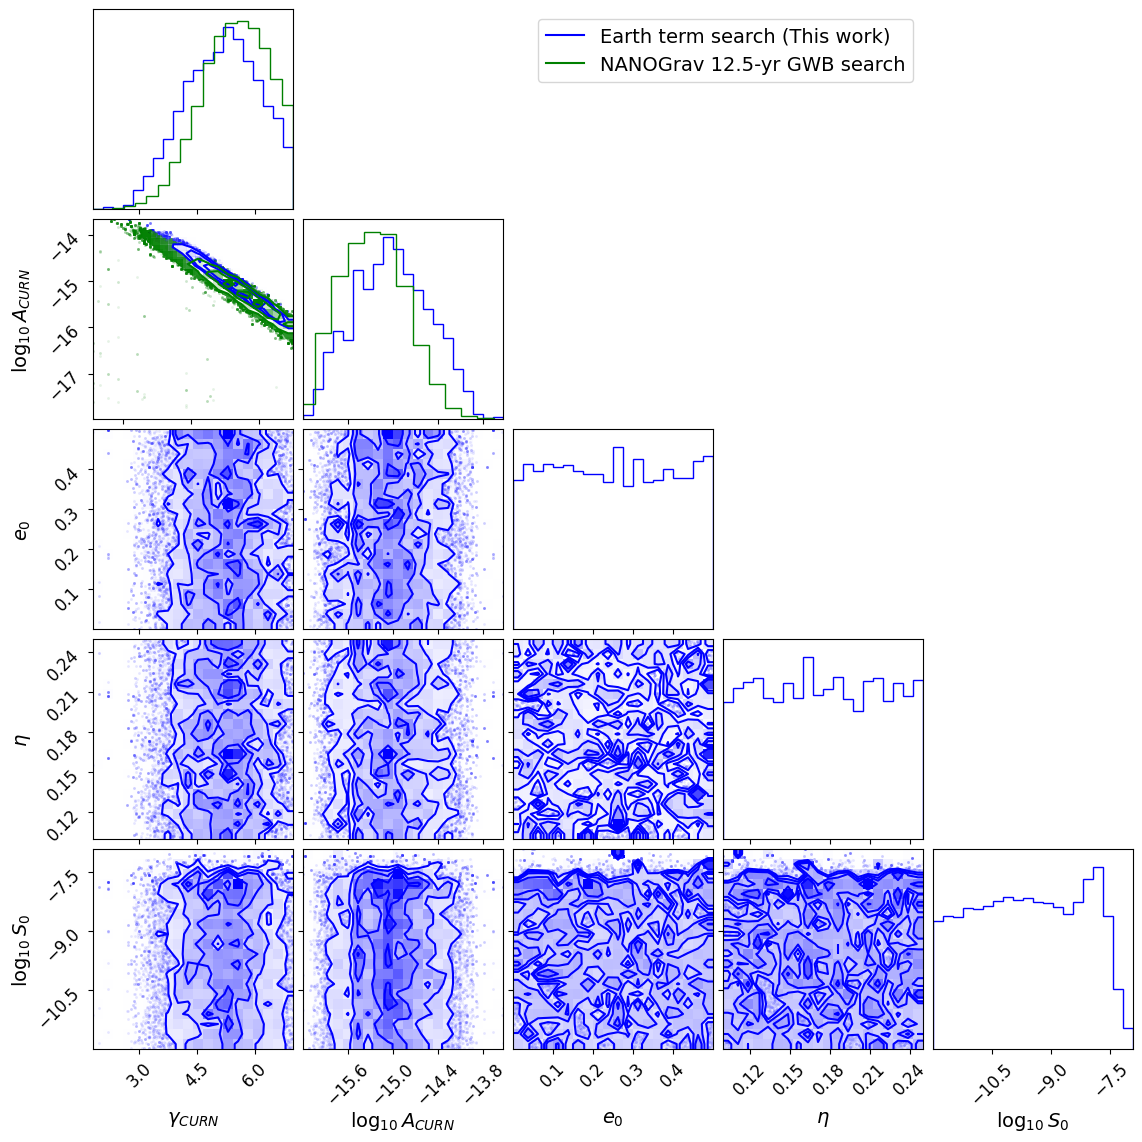

In [25]:
fig = corner.corner(
    trimmed_chain_df[["gwb_gamma", "gwb_log10_A", "gwecc_e0", "gwecc_eta", "gwecc_log10_A"]], 
    labels=[
        "$\\gamma_{CURN}$",
        "$\\log_{10} A_{CURN}$",
        "$e_0$",
        "$\\eta$",
        "$\\log_{10} S_0$"
    ],
    hist_kwargs={"density":True}, 
    color="blue",
    label_kwargs={"fontsize": 14},
)

plt.subplot(551)
plt.hist(ng125_chain_df["gw_gamma"].to_numpy(), density=True, histtype="step", color="green", bins=20)

plt.subplot(556)
corner.hist2d(ng125_chain_df["gw_gamma"].to_numpy(), ng125_chain_df["gw_log10_A"].to_numpy(), color="green", alpha=0.6)

plt.subplot(557)
plt.hist(ng125_chain_df["gw_log10_A"].to_numpy(), density=True, histtype="step", color="green", bins=20)

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)


plt.subplot(554)
custom_lines = [Line2D([0], [0], color="blue"),
                Line2D([0], [0], color="green")]
plt.legend(custom_lines, ["Earth term search (This work)", "NANOGrav 12.5-yr GWB search"], fontsize=14)
# fig = corner.corner(ng125_chain_df[["gw_gamma", "gw_log10_A"]], fig=fig, hist_kwargs={"density":True}, color="blue")

plt.savefig("gwecc_posterior_E.pdf")

In [26]:
param_names_ep = np.loadtxt("E_P_params.txt", dtype=str)
chain_raw_ep = np.genfromtxt("E_P_chain_1.0.txt")

In [28]:
burn = 20000
chain_ep = chain_raw_ep[burn:, :-4]
chain_ep_df = pd.DataFrame(chain_ep, columns=param_names_ep)

In [30]:
trimmed_chain_ep_df = chain_ep_df.query("gwecc_eta>0.1 and gwecc_e0<0.5")

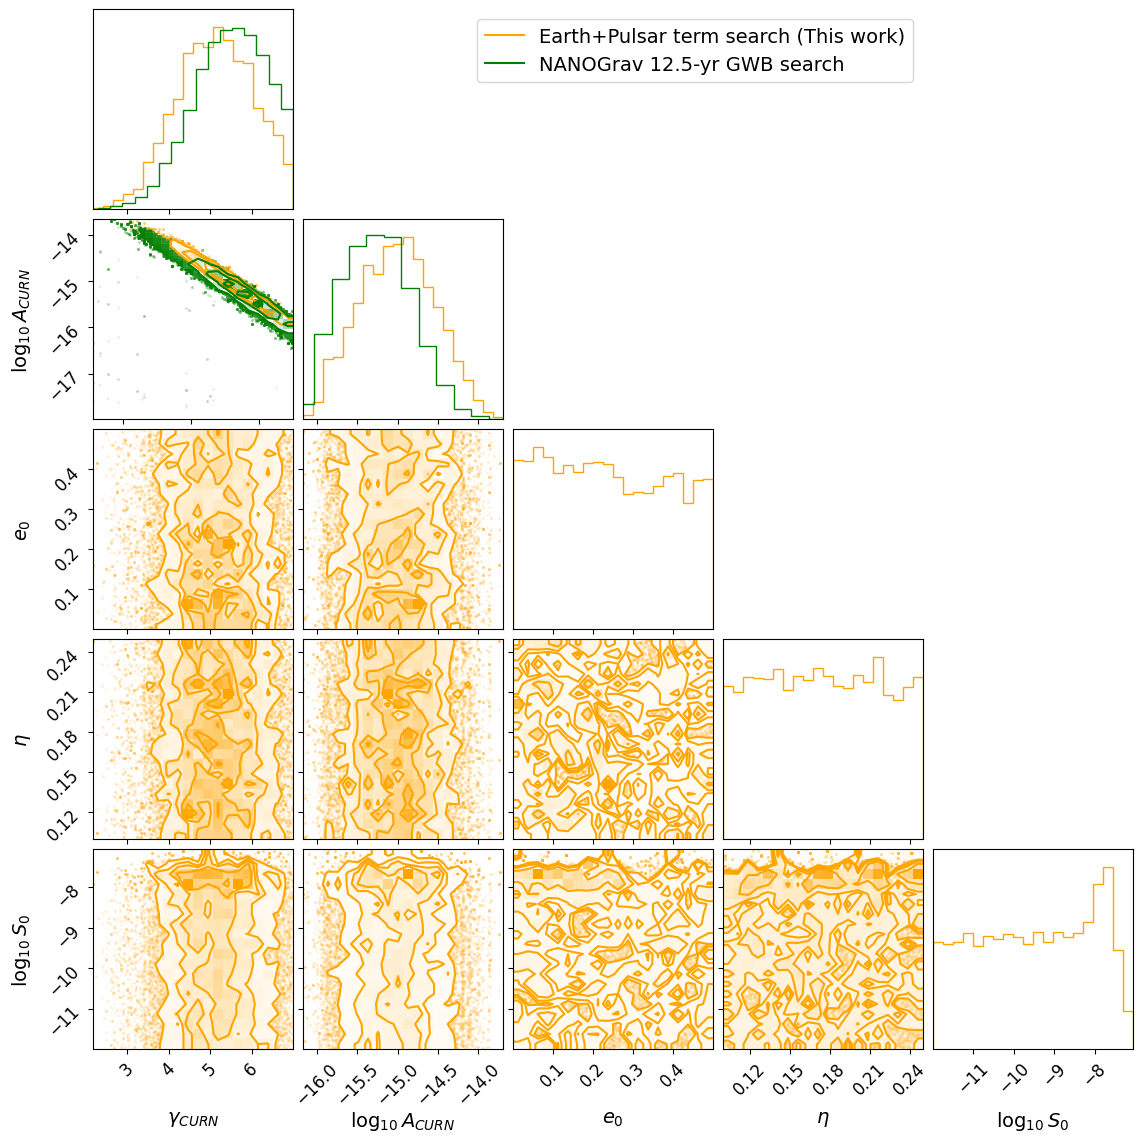

In [31]:
fig = corner.corner(
    trimmed_chain_ep_df[["gwb_gamma", "gwb_log10_A", "gwecc_e0", "gwecc_eta", "gwecc_log10_A"]], 
    labels=[
        "$\\gamma_{CURN}$",
        "$\\log_{10} A_{CURN}$",
        "$e_0$",
        "$\\eta$",
        "$\\log_{10} S_0$"
    ],
    hist_kwargs={"density":True}, 
    color="orange",
    label_kwargs={"fontsize": 14},
)

plt.subplot(551)
plt.hist(ng125_chain_df["gw_gamma"].to_numpy(), density=True, histtype="step", color="green", bins=20)

plt.subplot(556)
corner.hist2d(ng125_chain_df["gw_gamma"].to_numpy(), ng125_chain_df["gw_log10_A"].to_numpy(), color="green", alpha=0.6)

plt.subplot(557)
plt.hist(ng125_chain_df["gw_log10_A"].to_numpy(), density=True, histtype="step", color="green", bins=20)

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)


plt.subplot(554)
custom_lines = [Line2D([0], [0], color="orange"),
                Line2D([0], [0], color="green")]
plt.legend(custom_lines, ["Earth+Pulsar term search (This work)", "NANOGrav 12.5-yr GWB search"], fontsize=14)
# fig = corner.corner(ng125_chain_df[["gw_gamma", "gw_log10_A"]], fig=fig, hist_kwargs={"density":True}, color="blue")

plt.savefig("gwecc_posterior_EP.pdf")